In [11]:
import pandas as pd
import matplotlib.pyplot as plt

windows_os = False

if windows_os:
    base_path = "C:/Users"
else:
    base_path = r"/media/gianlucanogara/Windows/Users"
base = base_path + "/gianluca.nogara/Desktop/Repo/Vaccines_Discussion_Italy/Italian/"

In [4]:
tweets = pd.read_csv(base + "files/tweets/tweets.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,quoted_user_created_at,hashtags,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count
0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,"[{'text': 'GiornatadellaMemoria2020', 'indices...",[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN
1,1221737155380293640,1221737155380293640,Mon Jan 27 10:10:11 +0000 2020,1179711277,Grace_1207,False,Thu Feb 14 16:37:35 +0000 2013,"Oggi sono arrivati loro, 3 femminucce e 1 masc...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,[],[],"[{'screen_name': 'LidaSezOlbia', 'name': 'Lida...",[],[],[],NaN,NaN,NaN
2,1221730009989120001,1221730009989120001,Mon Jan 27 09:41:47 +0000 2020,115121530,MarisaMinervini,False,Wed Feb 17 17:40:09 +0000 2010,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN
3,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,...,NaN,[],[],[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],[],NaN,NaN,NaN
4,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],"[{'screen_name': 'Annalisa3073', 'name': 'Anna...",[],[],[],NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053196,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,NaN,[],[],"[{'screen_name': 'borghi_claudio', 'name': 'Cl...",[],[],[],102577.0,1060.0,1114.0
4053197,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,Wed Sep 02 14:03:01 +0000 2009,[],[],[],"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],[],79297.0,772.0,893.0
4053198,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,NaN,[],[],[],"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],[],655.0,226.0,55.0
4053199,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,NaN,"[{'text': 'lariachetira', 'indices': [14, 27]}]",[],"[{'screen_name': 'valy_s', 'name': 'Valeria S....",[],[],[],517677.0,13671.0,20847.0


In [12]:
sentiment = pd.read_csv(base + "script_directory_output/sentiment/merged.csv", lineterminator="\n", low_memory=False, encoding="utf-8")
sentiment

,id,text,sentiment,emotion
0,1221739084449832960,La Memoria è l’unico vaccino contro l’indiffer...,negative,joy
1,1221737155380293640,"Oggi sono arrivati loro, 3 femminucce e 1 masc...",positive,joy
2,1221730009989120001,L'indifferenza è più colpevole della violenza ...,negative,sadness
3,1221737654909382662,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...",negative,fear
4,1221728980203724801,"""Coltivare la Memoria è ancora oggi un vaccino...",positive,joy
...,...,...,...,...
4046638,1394609996197937159,Il medico testimonial pro vaccino a Ariachetir...,negative,anger
4046639,1394610015823147011,"""...«Ha lividi e piastrine basse». E ha richie...",negative,fear
4046640,1394609887641022464,"Vaccinazioni nei luoghi di lavoro, fondamental...",negative,fear
4046641,1394609899963830275,A lariachetira c’è un MEDICO DI BASE che ha ap...,negative,anger


In [12]:
sentiment = sentiment[["id", "sentiment", "emotion"]]
tweets = tweets.merge(sentiment, on="id", how="left")
tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,symbols,user_mentions,urls,polls,media,user_tweets_count,user_friends_count,user_followers_count,sentiment,emotion
0,1221739084449832960,1221739084449832960,Mon Jan 27 10:17:51 +0000 2020,241972508,planetpaul65,False,Sun Jan 23 16:31:07 +0000 2011,La Memoria è l’unico vaccino contro l’indiffer...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,[],"[{'screen_name': 'isentinelli', 'name': '@isen...",[],[],"[{'id': 1221708229090127872, 'id_str': '122170...",NaN,NaN,NaN,negative,joy
1,1221737155380293640,1221737155380293640,Mon Jan 27 10:10:11 +0000 2020,1179711277,Grace_1207,False,Thu Feb 14 16:37:35 +0000 2013,"Oggi sono arrivati loro, 3 femminucce e 1 masc...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,[],"[{'screen_name': 'LidaSezOlbia', 'name': 'Lida...",[],[],[],NaN,NaN,NaN,positive,joy
2,1221730009989120001,1221730009989120001,Mon Jan 27 09:41:47 +0000 2020,115121530,MarisaMinervini,False,Wed Feb 17 17:40:09 +0000 2010,L'indifferenza è più colpevole della violenza ...,"<a href=""http://twitter.com/download/android"" ...",NaN,...,[],"[{'screen_name': 'milio967', 'name': 'Εμιλιο ♌...",[],[],[],NaN,NaN,NaN,negative,sadness
3,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",NaN,...,[],[],"[{'url': 'https://t.co/CY0qiQFk6s', 'expanded_...",[],[],NaN,NaN,NaN,negative,fear
4,1221728980203724801,1221728980203724801,Mon Jan 27 09:37:42 +0000 2020,908731428124397568,arual812,False,Fri Sep 15 16:37:10 +0000 2017,"""Coltivare la Memoria è ancora oggi un vaccino...","<a href=""http://twitter.com/download/android"" ...",NaN,...,[],"[{'screen_name': 'Annalisa3073', 'name': 'Anna...",[],[],[],NaN,NaN,NaN,positive,joy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4053197,1394609996197937159,1394609996197937159,Tue May 18 11:05:08 +0000 2021,464822421,CiaoGrosso,False,Sun Jan 15 17:25:21 +0000 2012,Il medico testimonial pro vaccino a @Ariacheti...,"<a href=""http://twitter.com/download/iphone"" r...",NaN,...,[],"[{'screen_name': 'borghi_claudio', 'name': 'Cl...",[],[],[],102577.0,1060.0,1114.0,negative,anger
4053198,1394610015823147011,1394610015823147011,Tue May 18 11:05:13 +0000 2021,497188910,Rosskitty77,False,Sun Feb 19 18:26:36 +0000 2012,"""...«Ha lividi e piastrine basse». E ha richie...","<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,[],[],"[{'url': 'https://t.co/5UT12c2sur', 'expanded_...",[],[],79297.0,772.0,893.0,negative,fear
4053199,1394609887641022464,1394609887641022464,Tue May 18 11:04:42 +0000 2021,955571652468801536,GuidoIafrate,False,Mon Jan 22 22:43:30 +0000 2018,"Vaccinazioni nei luoghi di lavoro, fondamental...","<a href=""http://twitter.com/download/android"" ...",NaN,...,[],[],"[{'url': 'https://t.co/D3j3phCsiC', 'expanded_...",[],[],655.0,226.0,55.0,negative,fear
4053200,1394609899963830275,1394609899963830275,Tue May 18 11:04:45 +0000 2021,57358236,lucabattanta,False,Thu Jul 16 15:14:03 +0000 2009,A #lariachetira c’è un MEDICO DI BASE che ha a...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",NaN,...,[],"[{'screen_name': 'valy_s', 'name': 'Valeria S....",[],[],[],517677.0,13671.0,20847.0,negative,anger


In [13]:
pd.Series(tweets["sentiment"].value_counts())

negative    3541995
positive     504648
Name: sentiment, dtype: int64

In [14]:
pd.Series(tweets["emotion"].value_counts())

anger      2103234
fear        962450
sadness     490565
joy         490394
Name: emotion, dtype: int64

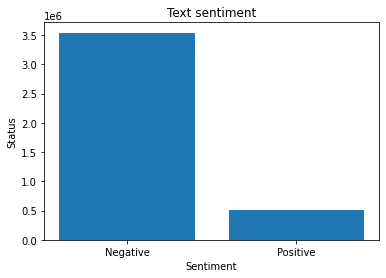

In [20]:
y = [3541995, 504648]
x = ["Negative", "Positive"]
plt.bar(x,y,align='center')
plt.xlabel('Sentiment')
plt.ylabel('Status')
plt.title('Text sentiment')
plt.show()

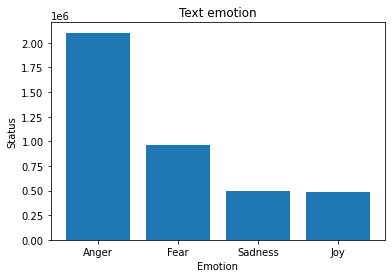

In [22]:
y = [2103234, 962450, 490565, 490394]
x = ["Anger",
"Fear",
"Sadness",
"Joy"]
plt.bar(x,y,align='center')
plt.xlabel('Emotion')
plt.ylabel('Status')
plt.title('Text emotion')
plt.show()
